# <center> <span style="color:lightblue">**Principle Component Analysis (PCA)**</span>

In [ ]:
#https://www.youtube.com/watch?v=iRbsBi5W0-c

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px

%matplotlib inline

In [7]:
#np.cov(X)

## Manual Implementation of PCA

In [10]:
np.random.seed(23)
mu_vec1= np.array([0,0,0])
cov_matl= np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample= np.random.multivariate_normal(mu_vec1,cov_matl,20)

df=pd.DataFrame(class1_sample,columns=["feature1","feature2","feature3"])
df["target"]=1

mu_vec2=np.array([1,1,1])
cov_mat2= np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample= np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1=pd.DataFrame(class2_sample,columns=["feature1","feature2","feature3"])
df1["target"]=0

df=df.append(df1,ignore_index=True)

df=df.sample(40)
df.head(5)

C:\Users\ACER\AppData\Local\Temp\ipykernel_8420\3918507778.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df1,ignore_index=True)


,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [17]:
fig=px.scatter_3d(df,x=df["feature1"],y=df["feature2"],z=df["feature3"],color=df["target"].astype("str"))

fig.update_traces(marker=dict(size=12,line=dict(width=2,color="DarkSlateGray")),selector=dict(mode="markers"))

fig.show()

In [18]:
# step 2 : apply standard Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [19]:
# Step 3 : Find Covariance Matrix
covariance_matrix =np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])

print("Covariance Matrix : ",covariance_matrix)

Covariance Matrix :  [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [20]:
# Step 4 : find Eigen Value and Eigen Vector
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix) #linalg = Linear Algibra
eigen_values,eigen_vectors

(array([1.3536065 , 0.94557084, 0.77774573]),
 array([[-0.53875915, -0.69363291,  0.47813384],
        [-0.65608325, -0.01057596, -0.75461442],
        [-0.52848211,  0.72025103,  0.44938304]]))

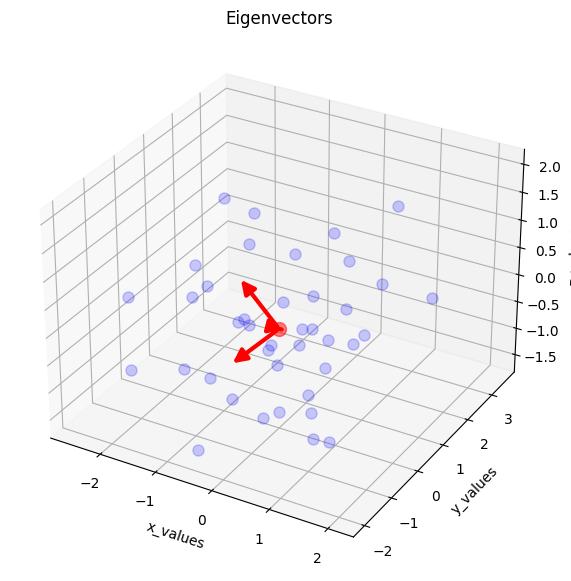

In [30]:


from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    # def draw(self, renderer):
    #     xs3d, ys3d, zs3d = self._verts3d
    #     xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
    #     self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
    #     FancyArrowPatch.draw(self, renderer)
    
    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')


plt.show()
     

In [24]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [25]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [26]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

## PCA using Sk-Learn

In [31]:
from sklearn.datasets import load_digits

digits=load_digits()

In [34]:
df=pd.DataFrame(digits["data"],columns=digits["feature_names"])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [42]:
df.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

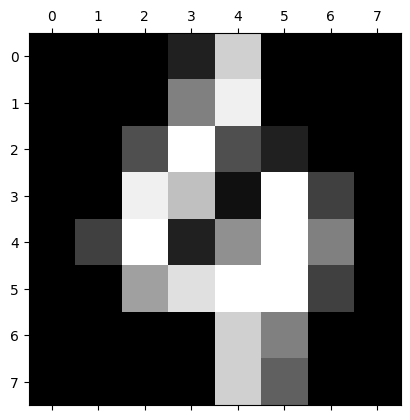

In [58]:
plt.gray()
plt.matshow(digits.images[100])
plt.show()

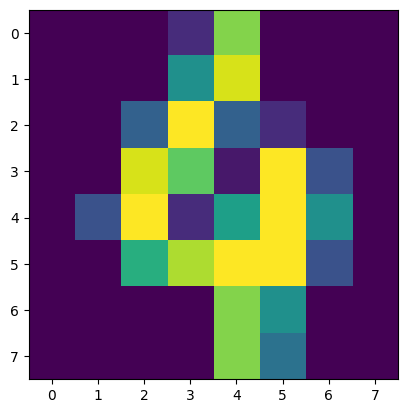

In [47]:

plt.imshow(df.iloc[100,:].values.reshape(8,8))